In [1]:
import xarray as xr

In [2]:
grib_arrays = xr.open_dataset("/datasets/grib2_data/wnd10m.cdas1.201509.grb2",engine='cfgrib')
grib_arrays

/usr/local/lib/python3.10/dist-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.24.2
  warnings.warn(


<xarray.Dataset> Size: 236MB
Dimensions:            (time: 120, step: 6, latitude: 200, longitude: 205)
Coordinates:
  * time               (time) datetime64[ns] 960B 2015-09-01 ... 2015-09-30T1...
  * step               (step) timedelta64[ns] 48B 01:00:00 02:00:00 ... 06:00:00
    heightAboveGround  float64 8B ...
  * latitude           (latitude) float64 2kB 41.81 41.6 41.4 ... 1.329 1.124
  * longitude          (longitude) float64 2kB 98.18 98.39 98.59 ... 139.7 139.9
    valid_time         (time, step) datetime64[ns] 6kB ...
Data variables:
    u                  (time, step, latitude, longitude) float32 118MB ...
    v                  (time, step, latitude, longitude) float32 118MB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             60
    GRIB_centreDescription:  National Center for Atmospheric Research 
    GRIB_subCentre:          1
    Conventions:             CF-1.7
    institution:             National Center for Atmospheric Research 
    history:                 2024-08-01T06:47 GRIB to CDM+CF via cfgrib-0.9.1...

In [19]:
list(grib_arrays.data_vars.keys())

['u', 'v']

In [36]:
grib_arrays

<xarray.Dataset> Size: 236MB
Dimensions:            (time: 120, step: 6, latitude: 200, longitude: 205)
Coordinates:
  * time               (time) datetime64[ns] 960B 2015-09-01 ... 2015-09-30T1...
  * step               (step) timedelta64[ns] 48B 01:00:00 02:00:00 ... 06:00:00
    heightAboveGround  float64 8B ...
  * latitude           (latitude) float64 2kB 41.81 41.6 41.4 ... 1.329 1.124
  * longitude          (longitude) float64 2kB 98.18 98.39 98.59 ... 139.7 139.9
    valid_time         (time, step) datetime64[ns] 6kB ...
Data variables:
    u                  (time, step, latitude, longitude) float32 118MB ...
    v                  (time, step, latitude, longitude) float32 118MB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             60
    GRIB_centreDescription:  National Center for Atmospheric Research 
    GRIB_subCentre:          1
    Conventions:             CF-1.7
    institution:             National Center for Atmospheric Research 
    history:                 2024-08-01T06:47 GRIB to CDM+CF via cfgrib-0.9.1...

In [44]:
import cartopy.crs as ccrs
import cartopy


In [46]:
import matplotlib.pyplot as plt


In [123]:
grib_arrays

<xarray.Dataset> Size: 236MB
Dimensions:            (time: 120, step: 6, latitude: 200, longitude: 205)
Coordinates:
  * time               (time) datetime64[ns] 960B 2015-09-01 ... 2015-09-30T1...
  * step               (step) timedelta64[ns] 48B 01:00:00 02:00:00 ... 06:00:00
    heightAboveGround  float64 8B ...
  * latitude           (latitude) float64 2kB 41.81 41.6 41.4 ... 1.329 1.124
  * longitude          (longitude) float64 2kB 98.18 98.39 98.59 ... 139.7 139.9
    valid_time         (time, step) datetime64[ns] 6kB 2015-09-01T01:00:00 .....
Data variables:
    u                  (time, step, latitude, longitude) float32 118MB -8.96 ...
    v                  (time, step, latitude, longitude) float32 118MB 0.89 ....
Attributes:
    GRIB_edition:            2
    GRIB_centre:             60
    GRIB_centreDescription:  National Center for Atmospheric Research 
    GRIB_subCentre:          1
    Conventions:             CF-1.7
    institution:             National Center for Atmospheric Research 
    history:                 2024-08-01T06:47 GRIB to CDM+CF via cfgrib-0.9.1...

In [141]:
grib_arrays.dims

FrozenMappingWarningOnValuesAccess({'time': 120, 'step': 6, 'latitude': 200, 'longitude': 205})

In [151]:
range(len(grib_arrays.data_vars))

range(0, 2)

In [143]:
list(grib_arrays.data_vars.keys())

['u', 'v']

In [174]:
cfsr_xarray = xr.concat([grib_arrays[list(grib_arrays.data_vars.keys())[z]] for z in range(len(grib_arrays.data_vars))], dim = "channel")

In [ ]:
new_time_coords = grib_arrays.coords['time'] + grib_arrays.coords['step']
new_time_coords

In [201]:
cfsr_xarray_stacked.coords['newtime']

<xarray.DataArray 'newtime' (newtime: 720)> Size: 6kB
array([(Timestamp('2015-09-01 00:00:00'), Timedelta('0 days 01:00:00')),
       (Timestamp('2015-09-01 00:00:00'), Timedelta('0 days 02:00:00')),
       (Timestamp('2015-09-01 00:00:00'), Timedelta('0 days 03:00:00')), ...,
       (Timestamp('2015-09-30 18:00:00'), Timedelta('0 days 04:00:00')),
       (Timestamp('2015-09-30 18:00:00'), Timedelta('0 days 05:00:00')),
       (Timestamp('2015-09-30 18:00:00'), Timedelta('0 days 06:00:00'))],
      dtype=object)
Coordinates:
    heightAboveGround  float64 8B 10.0
    valid_time         (newtime) datetime64[ns] 6kB 2015-09-01T01:00:00 ... 2...
  * newtime            (newtime) object 6kB MultiIndex
  * time               (newtime) datetime64[ns] 6kB 2015-09-01 ... 2015-09-30...
  * step               (newtime) timedelta64[ns] 6kB 01:00:00 ... 06:00:00

In [206]:
cfsr_xarray_stacked =  cfsr_xarray.stack(newtime=['time', 'step'])

cfsr_xarray_stacked = cfsr_xarray_stacked.swap_dims({'newtime':'valid_time'})


In [124]:
grib_arrays.coords

Coordinates:
  * time               (time) datetime64[ns] 960B 2015-09-01 ... 2015-09-30T1...
  * step               (step) timedelta64[ns] 48B 01:00:00 02:00:00 ... 06:00:00
    heightAboveGround  float64 8B ...
  * latitude           (latitude) float64 2kB 41.81 41.6 41.4 ... 1.329 1.124
  * longitude          (longitude) float64 2kB 98.18 98.39 98.59 ... 139.7 139.9
    valid_time         (time, step) datetime64[ns] 6kB 2015-09-01T01:00:00 .....

In [117]:
stacked['u'][:,:,3]

<xarray.DataArray 'u' (latitude: 200, longitude: 205)> Size: 164kB
array([[-9.590e+00, -9.870e+00, -1.008e+01, ...,  1.750e+00,  1.760e+00,
         1.430e+00],
       [-9.580e+00, -9.830e+00, -1.005e+01, ...,  9.100e-01,  1.200e+00,
         1.110e+00],
       [-9.120e+00, -9.380e+00, -9.680e+00, ..., -1.100e-01,  3.300e-01,
         5.200e-01],
       ...,
       [ 2.490e+00,  3.270e+00,  3.570e+00, ..., -1.000e-02,  1.000e-02,
         5.000e-02],
       [ 1.990e+00,  2.970e+00,  3.510e+00, ...,  4.000e-02,  5.000e-02,
         5.000e-02],
       [ 1.280e+00,  2.330e+00,  3.090e+00, ...,  1.400e-01,  1.200e-01,
         7.000e-02]], dtype=float32)
Coordinates:
    heightAboveGround  float64 8B ...
  * latitude           (latitude) float64 2kB 41.81 41.6 41.4 ... 1.329 1.124
  * longitude          (longitude) float64 2kB 98.18 98.39 98.59 ... 139.7 139.9
    valid_time         datetime64[ns] 8B 2015-09-01T04:00:00
    newtime            object 8B (Timestamp('2015-09-01 00:00:00'), Timedelta...
    time               datetime64[ns] 8B 2015-09-01
    step               timedelta64[ns] 8B 04:00:00
Attributes: (12/30)
    GRIB_paramId:                             131
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      41000
    GRIB_typeOfLevel:                         heightAboveGround
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_name:                                U component of wind
    GRIB_shortName:                           u
    GRIB_units:                               m s**-1
    long_name:                                U component of wind
    units:                                    m s**-1
    standard_name:                            eastward_wind

In [209]:
grib_arrays['valid_time'][0,3]

<xarray.DataArray 'valid_time' ()> Size: 8B
array('2015-09-01T04:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time               datetime64[ns] 8B 2015-09-01
    step               timedelta64[ns] 8B 04:00:00
    heightAboveGround  float64 8B ...
    valid_time         datetime64[ns] 8B 2015-09-01T04:00:00
Attributes:
    standard_name:  time
    long_name:      time

In [222]:
i = 3
[grib_arrays['u'][0,i].min().values, grib_arrays['u'][0,i].max().values,grib_arrays['u'][0,i].mean().values]

[array(-12.66, dtype=float32),
 array(10.4, dtype=float32),
 array(-0.06031559, dtype=float32)]

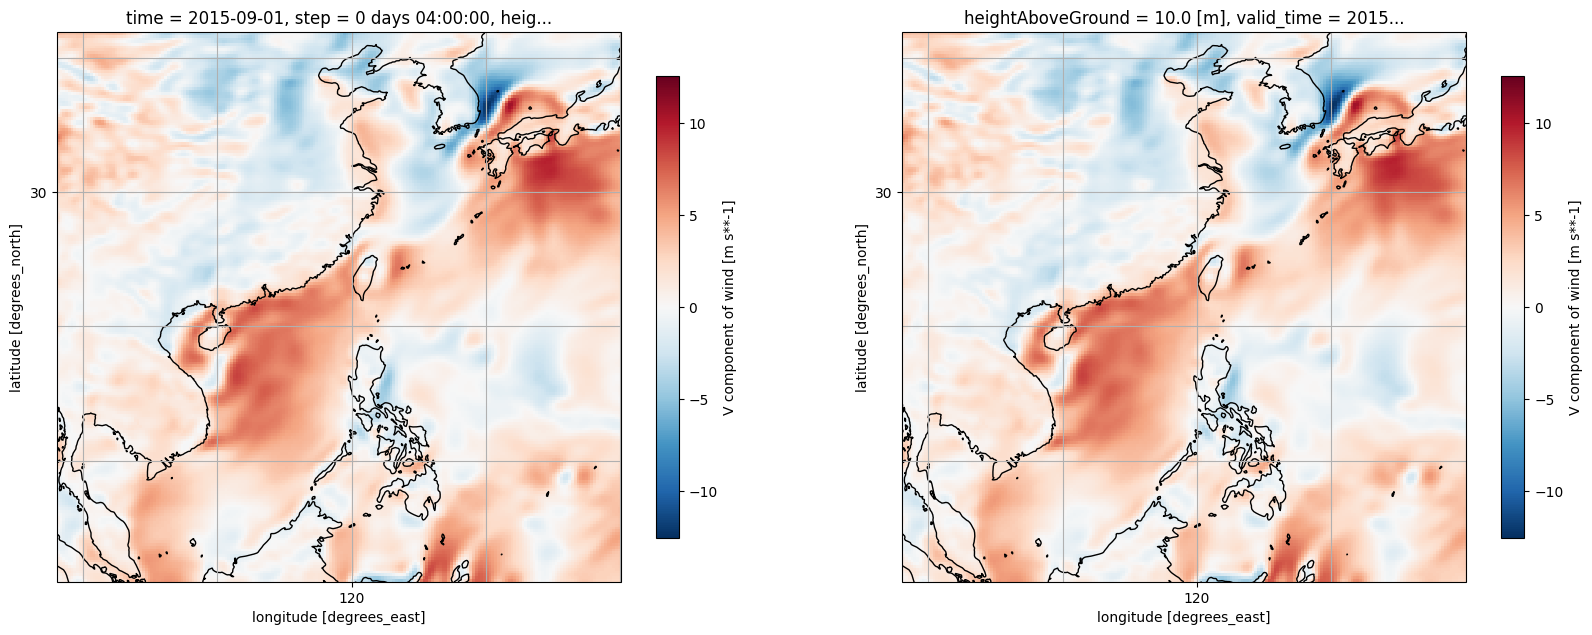

In [171]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20, 10), subplot_kw={'projection': ccrs.PlateCarree()})

ax1.coastlines(resolution="50m")
# 添加经纬度坐标
ax1.set_xticks(range(-180, 181, 30), crs=ccrs.PlateCarree())
ax1.set_yticks(range(-90, 91, 30), crs=ccrs.PlateCarree())
ax1.gridlines(draw_labels=False)
plot1 = grib_arrays['v'][0,3,:,:].plot(ax=ax1, transform=ccrs.PlateCarree(),cbar_kwargs={"shrink": 0.6})

ax2.coastlines(resolution="50m")
# 添加经纬度坐标
ax2.set_xticks(range(-180, 181, 30), crs=ccrs.PlateCarree())
ax2.set_yticks(range(-90, 91, 30), crs=ccrs.PlateCarree())
ax2.gridlines(draw_labels=False)
plot2 = stacked['v'][:,:,3].plot(ax=ax2, transform=ccrs.PlateCarree(),cbar_kwargs={"shrink": 0.6})

In [77]:
grib_arrays.dims

FrozenMappingWarningOnValuesAccess({'time': 120, 'step': 6, 'latitude': 200, 'longitude': 205})

In [ ]:
stacked = grib_arrays.stack(newtime=['time', 'step'])


In [140]:
stacked[list(stacked.data_vars.keys())]

<xarray.Dataset> Size: 236MB
Dimensions:            (latitude: 200, longitude: 205, newtime: 720)
Coordinates:
    heightAboveGround  float64 8B ...
  * latitude           (latitude) float64 2kB 41.81 41.6 41.4 ... 1.329 1.124
  * longitude          (longitude) float64 2kB 98.18 98.39 98.59 ... 139.7 139.9
    valid_time         (newtime) datetime64[ns] 6kB 2015-09-01T01:00:00 ... 2...
  * newtime            (newtime) object 6kB MultiIndex
  * time               (newtime) datetime64[ns] 6kB 2015-09-01 ... 2015-09-30...
  * step               (newtime) timedelta64[ns] 6kB 01:00:00 ... 06:00:00
Data variables:
    u                  (latitude, longitude, newtime) float32 118MB -8.96 ......
    v                  (latitude, longitude, newtime) float32 118MB 0.89 ... ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             60
    GRIB_centreDescription:  National Center for Atmospheric Research 
    GRIB_subCentre:          1
    Conventions:             CF-1.7
    institution:             National Center for Atmospheric Research 
    history:                 2024-08-01T06:47 GRIB to CDM+CF via cfgrib-0.9.1...

In [138]:
[z[list(z.data_vars.keys())[0]] for z in stacked]

AttributeError: 'str' object has no attribute 'data_vars'

In [129]:
len(stacked)

2

In [100]:
grib_arrays.coords['newtime']

KeyError: "No variable named 'newtime'. Variables on the dataset include ['time', 'step', 'heightAboveGround', 'latitude', 'longitude', 'valid_time', 'u', 'v']"

In [96]:
new_time_coords = grib_arrays.coords['time'] + grib_arrays.coords['step']
new_time_coords

<xarray.DataArray (time: 120, step: 6)> Size: 6kB
array([['2015-09-01T01:00:00.000000000', '2015-09-01T02:00:00.000000000',
        '2015-09-01T03:00:00.000000000', '2015-09-01T04:00:00.000000000',
        '2015-09-01T05:00:00.000000000', '2015-09-01T06:00:00.000000000'],
       ['2015-09-01T07:00:00.000000000', '2015-09-01T08:00:00.000000000',
        '2015-09-01T09:00:00.000000000', '2015-09-01T10:00:00.000000000',
        '2015-09-01T11:00:00.000000000', '2015-09-01T12:00:00.000000000'],
       ['2015-09-01T13:00:00.000000000', '2015-09-01T14:00:00.000000000',
        '2015-09-01T15:00:00.000000000', '2015-09-01T16:00:00.000000000',
        '2015-09-01T17:00:00.000000000', '2015-09-01T18:00:00.000000000'],
       ['2015-09-01T19:00:00.000000000', '2015-09-01T20:00:00.000000000',
        '2015-09-01T21:00:00.000000000', '2015-09-01T22:00:00.000000000',
        '2015-09-01T23:00:00.000000000', '2015-09-02T00:00:00.000000000'],
       ['2015-09-02T01:00:00.000000000', '2015-09-02T02:00:00.000000000',
        '2015-09-02T03:00:00.000000000', '2015-09-02T04:00:00.000000000',
        '2015-09-02T05:00:00.000000000', '2015-09-02T06:00:00.000000000'],
       ['2015-09-02T07:00:00.000000000', '2015-09-02T08:00:00.000000000',
        '2015-09-02T09:00:00.000000000', '2015-09-02T10:00:00.000000000',
        '2015-09-02T11:00:00.000000000', '2015-09-02T12:00:00.000000000'],
       ['2015-09-02T13:00:00.000000000', '2015-09-02T14:00:00.000000000',
        '2015-09-02T15:00:00.000000000', '2015-09-02T16:00:00.000000000',
...
        '2015-09-29T11:00:00.000000000', '2015-09-29T12:00:00.000000000'],
       ['2015-09-29T13:00:00.000000000', '2015-09-29T14:00:00.000000000',
        '2015-09-29T15:00:00.000000000', '2015-09-29T16:00:00.000000000',
        '2015-09-29T17:00:00.000000000', '2015-09-29T18:00:00.000000000'],
       ['2015-09-29T19:00:00.000000000', '2015-09-29T20:00:00.000000000',
        '2015-09-29T21:00:00.000000000', '2015-09-29T22:00:00.000000000',
        '2015-09-29T23:00:00.000000000', '2015-09-30T00:00:00.000000000'],
       ['2015-09-30T01:00:00.000000000', '2015-09-30T02:00:00.000000000',
        '2015-09-30T03:00:00.000000000', '2015-09-30T04:00:00.000000000',
        '2015-09-30T05:00:00.000000000', '2015-09-30T06:00:00.000000000'],
       ['2015-09-30T07:00:00.000000000', '2015-09-30T08:00:00.000000000',
        '2015-09-30T09:00:00.000000000', '2015-09-30T10:00:00.000000000',
        '2015-09-30T11:00:00.000000000', '2015-09-30T12:00:00.000000000'],
       ['2015-09-30T13:00:00.000000000', '2015-09-30T14:00:00.000000000',
        '2015-09-30T15:00:00.000000000', '2015-09-30T16:00:00.000000000',
        '2015-09-30T17:00:00.000000000', '2015-09-30T18:00:00.000000000'],
       ['2015-09-30T19:00:00.000000000', '2015-09-30T20:00:00.000000000',
        '2015-09-30T21:00:00.000000000', '2015-09-30T22:00:00.000000000',
        '2015-09-30T23:00:00.000000000', '2015-10-01T00:00:00.000000000']],
      dtype='datetime64[ns]')
Coordinates:
  * time               (time) datetime64[ns] 960B 2015-09-01 ... 2015-09-30T1...
    heightAboveGround  float64 8B 10.0
  * step               (step) timedelta64[ns] 48B 01:00:00 02:00:00 ... 06:00:00

In [91]:
stacked

<xarray.Dataset> Size: 236MB
Dimensions:            (latitude: 200, longitude: 205, newtime: 720)
Coordinates:
    heightAboveGround  float64 8B ...
  * latitude           (latitude) float64 2kB 41.81 41.6 41.4 ... 1.329 1.124
  * longitude          (longitude) float64 2kB 98.18 98.39 98.59 ... 139.7 139.9
    valid_time         (newtime) datetime64[ns] 6kB 2015-09-01T01:00:00 ... 2...
  * newtime            (newtime) object 6kB MultiIndex
  * time               (newtime) datetime64[ns] 6kB 2015-09-01 ... 2015-09-30...
  * step               (newtime) timedelta64[ns] 6kB 01:00:00 ... 06:00:00
Data variables:
    u                  (latitude, longitude, newtime) float32 118MB -8.96 ......
    v                  (latitude, longitude, newtime) float32 118MB 0.89 ... ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             60
    GRIB_centreDescription:  National Center for Atmospheric Research 
    GRIB_subCentre:          1
    Conventions:             CF-1.7
    institution:             National Center for Atmospheric Research 
    history:                 2024-08-01T06:47 GRIB to CDM+CF via cfgrib-0.9.1...

In [80]:
stacked = stacked.transpose('newtime', "latitude", "longitude")

In [89]:
stacked.coords['newtime'][0:10]

<xarray.DataArray 'newtime' (newtime: 10)> Size: 80B
array([(Timestamp('2015-09-01 00:00:00'), Timedelta('0 days 01:00:00')),
       (Timestamp('2015-09-01 00:00:00'), Timedelta('0 days 02:00:00')),
       (Timestamp('2015-09-01 00:00:00'), Timedelta('0 days 03:00:00')),
       (Timestamp('2015-09-01 00:00:00'), Timedelta('0 days 04:00:00')),
       (Timestamp('2015-09-01 00:00:00'), Timedelta('0 days 05:00:00')),
       (Timestamp('2015-09-01 00:00:00'), Timedelta('0 days 06:00:00')),
       (Timestamp('2015-09-01 06:00:00'), Timedelta('0 days 01:00:00')),
       (Timestamp('2015-09-01 06:00:00'), Timedelta('0 days 02:00:00')),
       (Timestamp('2015-09-01 06:00:00'), Timedelta('0 days 03:00:00')),
       (Timestamp('2015-09-01 06:00:00'), Timedelta('0 days 04:00:00'))],
      dtype=object)
Coordinates:
    heightAboveGround  float64 8B ...
    valid_time         (newtime) datetime64[ns] 80B 2015-09-01T01:00:00 ... 2...
  * newtime            (newtime) object 80B MultiIndex
  * time               (newtime) datetime64[ns] 80B 2015-09-01 ... 2015-09-01...
  * step               (newtime) timedelta64[ns] 80B 01:00:00 ... 04:00:00

In [41]:
new_time_coords[0:10]

<xarray.DataArray (new_time: 10)> Size: 80B
array(['2015-09-01T01:00:00.000000000', '2015-09-01T02:00:00.000000000',
       '2015-09-01T03:00:00.000000000', '2015-09-01T04:00:00.000000000',
       '2015-09-01T05:00:00.000000000', '2015-09-01T06:00:00.000000000',
       '2015-09-01T07:00:00.000000000', '2015-09-01T08:00:00.000000000',
       '2015-09-01T09:00:00.000000000', '2015-09-01T10:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
    heightAboveGround  float64 8B 10.0
    valid_time         (new_time) datetime64[ns] 80B 2015-09-01T01:00:00 ... ...
  * new_time           (new_time) object 80B MultiIndex
  * time               (new_time) datetime64[ns] 80B 2015-09-01 ... 2015-09-0...
  * step               (new_time) timedelta64[ns] 80B 01:00:00 ... 04:00:00

In [ ]:
stacked = stacked.assign_coords(new_time=new_time_coords)
stacked = stacked.drop_vars(['time', 'step'])
expanded = stacked.unstack('new_time')
data_array = expanded.to_array().transpose('new_time', 'latitude', 'longitude')


In [9]:
cfsr_xarray = xr.concat(
    grib_arrays.data_vars, dim="channel"
)

TypeError: can only concatenate xarray Dataset and DataArray objects, got <class 'str'>

In [7]:
list(grib_arrays.data_vars.keys())

['u', 'v']

In [36]:
u = grib_arrays['u']
u.dims
u.shape

(120, 6, 200, 205)

In [27]:
grib_arrays.data_vars

Data variables:
    u        (time, step, latitude, longitude) float32 118MB ...
    v        (time, step, latitude, longitude) float32 118MB ...

In [46]:
cfsr_xarray = xr.concat(
    [g[list(g.data_vars.keys())[0]] for g in grib_arrays], dim="channel"
)

AttributeError: 'str' object has no attribute 'data_vars'

In [12]:
data.to_netcdf("/datasets/grib2_data/1.nc")

In [13]:
data1 = xarray.open_dataset("/datasets/grib2_data/1.nc")
data1

<xarray.Dataset> Size: 236MB
Dimensions:            (time: 120, step: 6, latitude: 200, longitude: 205)
Coordinates:
  * time               (time) datetime64[ns] 960B 2015-09-01 ... 2015-09-30T1...
  * step               (step) timedelta64[ns] 48B 01:00:00 02:00:00 ... 06:00:00
    heightAboveGround  float64 8B ...
  * latitude           (latitude) float64 2kB 41.81 41.6 41.4 ... 1.329 1.124
  * longitude          (longitude) float64 2kB 98.18 98.39 98.59 ... 139.7 139.9
    valid_time         (time, step) datetime64[ns] 6kB ...
Data variables:
    u                  (time, step, latitude, longitude) float32 118MB ...
    v                  (time, step, latitude, longitude) float32 118MB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             60
    GRIB_centreDescription:  National Center for Atmospheric Research 
    GRIB_subCentre:          1
    Conventions:             CF-1.7
    institution:             National Center for Atmospheric Research 
    history:                 2024-07-31T13:43 GRIB to CDM+CF via cfgrib-0.9.1...

In [2]:
era5 = xr.open_zarr(
    "gs://gcp-public-data-arco-era5/ar/1959-2022-full_37-1h-0p25deg-chunk-1.zarr-v2",
    chunks={'time': 48},
    consolidated=True,
)
era5

/usr/local/lib/python3.10/dist-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.24.2
  warnings.warn(


In [ ]:
	
    zarr_arrays = [xr.open_zarr(path) for path in zarr_paths]
	era5_xarray = xr.concat(
		[z[list(z.data_vars.keys())[0]] for z in zarr_arrays], dim="channel"
	)

In [4]:
# data = xarray.open_zarr("/datasets/zarr_data_temp/10m_u_component_of_wind.zarr")
# data = xarray.open_zarr("/datasets/zarr_data_temp/10m_v_component_of_wind.zarr")
# data = xarray.open_zarr("/datasets/zarr_data_temp/surface_pressure.zarr")

data = xarray.open_zarr("/datasets/zarr_data_temp/mean_wave_period.zarr")
# data = xarray.open_zarr("/datasets/zarr_data_temp/significant_height_of_combined_wind_waves_and_swell.zarr")

data

<xarray.Dataset> Size: 1MB
Dimensions:    (latitude: 83, longitude: 85, time: 24)
Coordinates:
  * latitude   (latitude) float32 332B 42.0 41.5 41.0 40.5 ... 2.5 2.0 1.5 1.0
  * longitude  (longitude) float32 340B 98.0 98.5 99.0 ... 139.0 139.5 140.0
  * time       (time) datetime64[ns] 192B 2015-09-27 ... 2015-09-27T23:00:00
Data variables:
    mwp        (time, latitude, longitude) float64 1MB dask.array<chunksize=(1, 83, 85), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2024-07-31 09:58:40 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

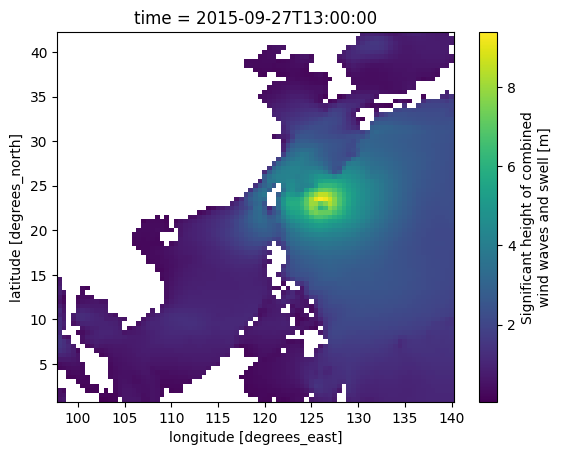

In [11]:
data.swh.shape
data.swh[13].plot()


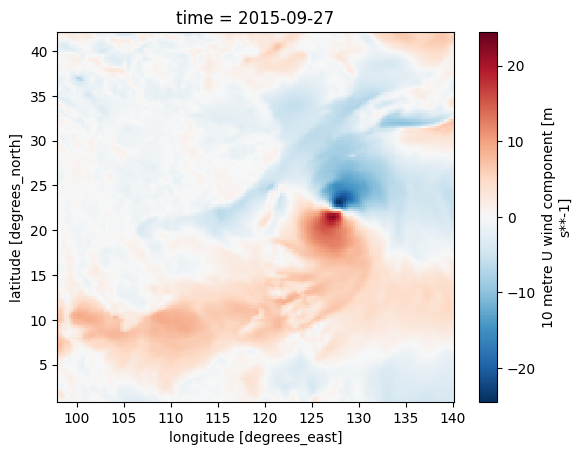

In [ ]:
u = era5['10m_u_component_of_wind']
v = era5['10m_v_component_of_wind']

In [ ]:
u

In [ ]:
u[1,:,:].values

In [ ]:
u1 = u[1,:,:]

In [ ]:
u1

In [ ]:
np.save('u.npy', u1)

In [ ]:
u1.plot()

In [ ]:
import cartopy.mpl.ticker as cticker
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from cartopy.mpl.ticker import LongitudeFormatter ,LatitudeFormatter
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [ ]:
u = era5['10m_u_component_of_wind']
v = era5['10m_v_component_of_wind']